# CLIENTES DE COMÉRCIO ELETRÔNICO

## IMPORTAÇÕES DE BIBLIOTECAS

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#dataset dO kaggle
clientes = pd.read_csv('C:/Users/PICHAU/Desktop/Análises de dados/Machine Learning/Regressão Linear II/dados/Ecommerce Customers.csv')
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [17]:
#Traduzindo colunas do dataset
clientes.rename(columns={'Address':'Endereco', 'Avg. Session Length':'Tempo_sessao', 'Time on App': 'Tempo_app', 'Time on Website':'Tempo_site',
                         'Length of Membership':'Tempo_membro','Yearly Amount Spent':'Valor_anual_gasto'}, inplace=True)
clientes.head()

,Email,Endereco,Avatar,Tempo_sessao,Tempo_app,Tempo_site,Tempo_membro,Valor_anual_gasto
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


**Informações sobre algumas colunas com valores númericos:**

    •Tempo_sessao: Tempo médio das sessões de consultoria na loja
    •Tempo_app: Tempo médio gasto no app em minutos
    •Tempo_site: Tempo gasto no site em minutos
    •Tempo_membro: Há quanto tempo o cliente é membro
    •Valor_anual_gasto: Valor gasto por ano em $

In [18]:
#Visualizar algumas informações em geral e dados faltantes
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Email              500 non-null    object 
 1   Endereco           500 non-null    object 
 2   Avatar             500 non-null    object 
 3   Tempo_sessao       500 non-null    float64
 4   Tempo_app          500 non-null    float64
 5   Tempo_site         500 non-null    float64
 6   Tempo_membro       500 non-null    float64
 7   Valor_anual_gasto  500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [20]:
clientes.describe()

,Tempo_sessao,Tempo_app,Tempo_site,Tempo_membro,Valor_anual_gasto
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## ANÁLISE EXPLORATÓRIA

In [45]:
sns.set_style('whitegrid')
sns.set_palette('flare_r')

In [23]:
clientes.columns

Index(['Email', 'Endereco', 'Avatar', 'Tempo_sessao', 'Tempo_app',
       'Tempo_site', 'Tempo_membro', 'Valor_anual_gasto'],
      dtype='object')

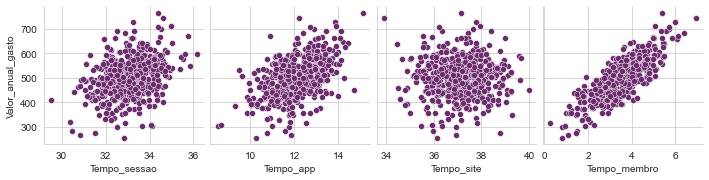

In [46]:
#Análise prévia sobre o Valor_anual_gasto
sns.pairplot(data = clientes, x_vars=['Tempo_sessao', 'Tempo_app',
       'Tempo_site', 'Tempo_membro'],
            y_vars='Valor_anual_gasto')

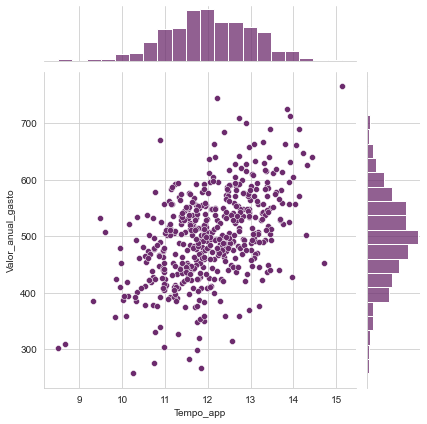

In [47]:
#Usando o jointplot na variável Tempo_app
sns.jointplot(x='Tempo_app', y='Valor_anual_gasto',data=clientes)

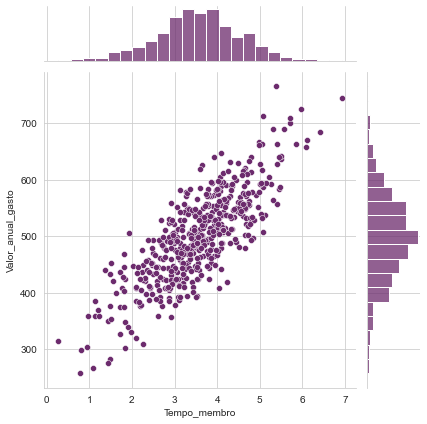

In [48]:
#Usando o jointplot na variável Tempo_membro
sns.jointplot(x='Tempo_membro', y='Valor_anual_gasto',data=clientes)

**obs:** Tempo_membro parece ser a variável que tem mais correlação com o Valor anual gasto

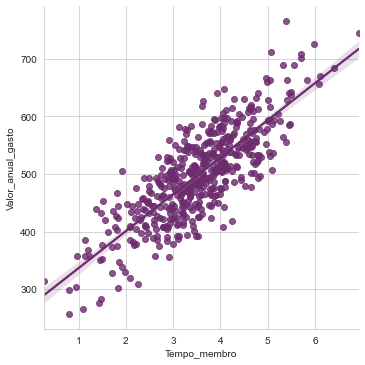

In [51]:
sns.lmplot(x='Tempo_membro', y='Valor_anual_gasto', data=clientes)

<AxesSubplot:>

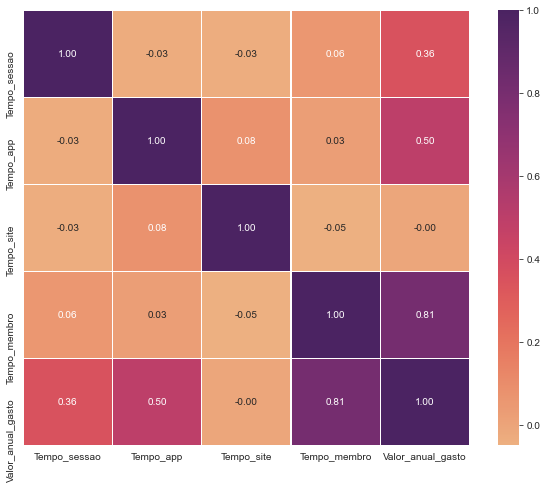

In [56]:
#Grafico de calor para verificar as correlações
plt.figure(figsize=(10,8))
sns.heatmap(clientes.corr(), annot=True, lw=0.3, fmt='.2f', cmap='flare')

**obs:** Quanto mais proximo do 1(Roxo) o heatmap indica uma forte correlação.


## Treinando e testando os dados

In [60]:
clientes.columns

Index(['Email', 'Endereco', 'Avatar', 'Tempo_sessao', 'Tempo_app',
       'Tempo_site', 'Tempo_membro', 'Valor_anual_gasto'],
      dtype='object')

In [63]:
X= clientes[['Tempo_sessao', 'Tempo_app','Tempo_site', 'Tempo_membro']]
y = clientes['Valor_anual_gasto']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [69]:
#Também conhecido como intercepto y, é simplesmente o valor no qual a linha ajustada cruza o eixo y
lm.intercept_

-1047.932782250239

In [72]:
#Verificando os coeficientes
coef = pd.DataFrame(lm.coef_.round(2),X.columns, columns=['coefs'])
coef

,coefs
Tempo_sessao,25.98
Tempo_app,38.59
Tempo_site,0.19
Tempo_membro,61.28


**Interpretendo os coeficientes:**

•Mantendo todas as outras variáveis fixas, com aumento de 1 unidade no Tempo_sessao temos um aumento de: 25.53 no Valor anual.

•Mantendo todas as outras variáveis fixas, com aumento de 1 unidade no Tempo_app temos um aumento de: 38.59 no Valor anual.

•Mantendo todas as outras variáveis fixas, com aumento de 1 unidade no Tempo_site temos um aumento de: 0.19 no Valor anual.

•Mantendo todas as outras variáveis fixas, com aumento de 1 unidade no Tempo_membro temos um aumento de: 61.28 no preço.


### Obetendo previsões do modelo

In [85]:
predicoes=lm.predict(X_test)

Text(0, 0.5, 'valores preditos')

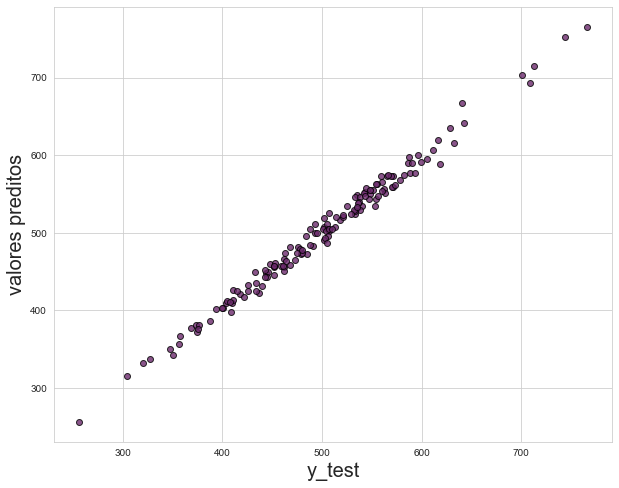

In [86]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,predicoes,edgecolor='black',alpha=0.8)
plt.xlabel('y_test', fontsize=20)
plt.ylabel('valores preditos', fontsize=20)

#### Avaliando o modelo

In [87]:
from sklearn import metrics

In [88]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predicoes))
print('MSE:', metrics.mean_squared_error(y_test, predicoes))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicoes)))

MAE: 7.228148653430817
MSE: 79.81305165097412
RMSE: 8.933815066978616


**Modelo em média erra $ 8.9**

Calculando o erro médio absoluto, o erro médio quadrático e o erro médio quadrático

MAE é o mais fácil de entender, porque é o erro médio.

MSE é mais popular do que o MAE, porque o MSE "pune" erros maiores, o que tende a ser útil no mundo real.

RMSE é ainda mais popular que o MSE, porque o RMSE é interpretável nas unidades "y".

### Resíduos

O resíduo representa a quantidade da variabilidade de Y que o modelo ajustado não consegue explicar. E os resíduos podem ser calculados com a seguinte fórmula:

residuo = Y-Yˆ

Onde Y é o valor real e Y^é o valor calculado pelo modelo.

<AxesSubplot:xlabel='Valor_anual_gasto', ylabel='Count'>

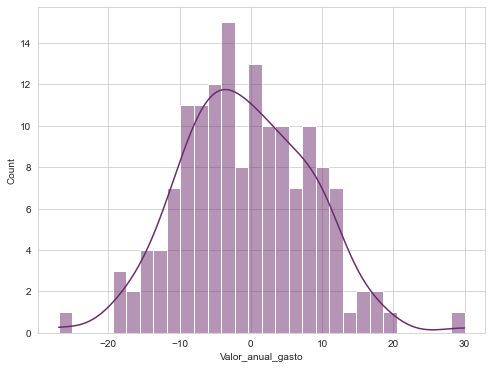

In [106]:
plt.figure(figsize=(8,6))
sns.histplot((y_test-predicoes),bins=30, kde=True)

**obs:** Os resíduos devem ter uma distribuição normal

In [107]:
coef

,coefs
Tempo_sessao,25.98
Tempo_app,38.59
Tempo_site,0.19
Tempo_membro,61.28
